# Data Exploration and Preprocess

In this part, we will mainly examine the distributions and meanings of each variable at first. Then give decisions about feature selection and missing value imputation techniques to create a sufficiently clean data for the modeling part. The sections are:

1. [Import Needed Libraries](#section0) 
1. [Read and Split the Dataset](#section1) 
2. [Binary Variables](#section1.1) 
3. [Categorical Variables](#section1.2) 
4. [Numerical Variables](#section1.3) 
5. [Correlation Check](#section1.4) 

<div style="text-align: right"> Ahmet Talha Yiğit / 507191101 </div>

<a id='section0'></a>
### 1. Import Needed Libraries

In [2]:
# Import needed packages for the data exploration stage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn import preprocessing
from collections import Counter
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from scipy.stats import skew

pd.set_option('mode.chained_assignment',None)
pd.set_option('display.max_columns', 50)
pd.options.display.float_format = "{:,.2f}".format

<a id='section1'></a>
### 2. Read and Split the Dataset

In [2]:
csv = '.\Data\FPD_Detection_Thesis_Data.csv' # Assign the name of the csv file.
dataframe = pd.read_csv(csv, sep = ';') # Read the csv file.
dataframe.head() # Inspect the raw data.

,Target,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39,Var_40
0,0,N,X,3.00,"1,331.00",0.00,1.00,Y,Y,Y,1,"4,000.00",NaN,NaN,NaN,1,0,0,"9,050.00",0.00,0.00,N,N,0,0.00,NaN,0.36,1.00,0.00,0.00,0,NaN,0,14.00,L,Y,0.00,0.00,0.00,0,NaN
1,0,N,X,4.00,"1,174.00","6,002.00",1.00,Y,Y,Y,1,"5,900.00",NaN,NaN,NaN,1,0,0,"16,710.00",2.87,1.01,N,N,0,0.00,NaN,0.48,5.00,0.00,0.00,0,0,0,8.00,O,Y,0.00,0.00,0.00,0,NaN
2,0,N,X,2.00,980.00,"2,455.00",0.00,Y,Y,Y,1,"2,000.00",NaN,NaN,NaN,1,0,0,"3,600.00",0.00,0.69,N,N,0,0.00,NaN,0.00,5.00,0.00,0.00,0,NaN,0,22.00,L,Y,0.00,0.00,0.00,0,NaN
3,0,N,X,6.00,"1,070.00",632.00,0.00,Y,N,Y,1,"2,971.00",NaN,NaN,NaN,1,0,0,"2,750.00",0.00,3.16,N,N,0,0.00,NaN,0.25,1.00,0.00,0.00,0,NaN,0,0.00,L,N,0.00,0.00,0.00,0,NaN
4,0,N,X,0.00,"1,257.00",200.00,0.00,Y,Y,Y,1,"3,500.00",NaN,NaN,NaN,1,0,0,"1,300.00",0.00,0.20,N,N,0,0.00,NaN,0.00,5.00,0.00,0.00,0,1,0,22.00,I,Y,0.00,0.00,0.00,0,NaN


In [3]:
dataframe.describe() # Check for the variable statistics

,Target,Var_3,Var_4,Var_5,Var_6,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_32,Var_33,Var_36,Var_37,Var_38,Var_39
count,"75,000.00","74,537.00","74,497.00","74,497.00","74,537.00","75,000.00","74,504.00","2,083.00","2,083.00","2,403.00","75,000.00","75,000.00","75,000.00","74,497.00","74,537.00","74,537.00","75,000.00","74,520.00","9,615.00","74,537.00","69,430.00","59,023.00","74,520.00","75,000.00","75,000.00","73,634.00","74,515.00","74,520.00","74,515.00","75,000.00"
mean,0.01,3.07,"1,233.86","1,475.15",0.85,0.71,"21,601.55",1.77,0.15,0.71,0.79,0.00,0.00,"11,119.16",30.05,1.36,0.01,0.00,0.06,0.13,1.90,0.13,0.00,0.06,0.00,12.96,20.06,0.00,4.63,0.05
std,0.10,3.71,341.67,"4,486.81",1.25,0.45,"4,727,667.58",3.83,0.64,1.79,0.41,0.02,0.02,"22,437.99",208.70,64.39,0.11,0.12,0.31,5.40,1.47,0.54,0.04,0.23,0.00,10.56,959.69,0.47,308.88,0.22
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,"1,094.00",7.00,0.00,0.00,"1,621.00",0.00,0.00,0.00,1.00,0.00,0.00,"1,500.00",0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00
50%,0.00,2.00,"1,268.00",500.00,0.00,1.00,"2,500.00",0.00,0.00,0.00,1.00,0.00,0.00,"5,000.00",0.00,0.20,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00
75%,0.00,4.00,"1,432.00","1,450.00",1.00,1.00,"4,180.00",2.00,0.00,0.00,1.00,0.00,0.00,"11,880.00",0.00,0.41,0.00,0.00,0.00,0.13,2.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00
max,1.00,112.00,"1,900.00","404,590.00",39.00,1.00,"1,290,438,565.00",34.00,15.00,26.00,1.00,1.00,1.00,"854,550.00","14,969.00","15,994.00",1.00,33.00,7.00,"1,151.00",5.00,7.00,6.00,1.00,0.00,42.00,"146,810.00",127.00,"63,750.00",1.00


In [4]:
dataframe.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  75000 non-null  int64  
 1   Var_1   74520 non-null  object 
 2   Var_2   73040 non-null  object 
 3   Var_3   74537 non-null  float64
 4   Var_4   74497 non-null  float64
 5   Var_5   74497 non-null  float64
 6   Var_6   74537 non-null  float64
 7   Var_7   74520 non-null  object 
 8   Var_8   75000 non-null  object 
 9   Var_9   75000 non-null  object 
 10  Var_10  75000 non-null  int64  
 11  Var_11  74504 non-null  float64
 12  Var_12  2083 non-null   float64
 13  Var_13  2083 non-null   float64
 14  Var_14  2403 non-null   float64
 15  Var_15  75000 non-null  int64  
 16  Var_16  75000 non-null  int64  
 17  Var_17  75000 non-null  int64  
 18  Var_18  74497 non-null  float64
 19  Var_19  74537 non-null  float64
 20  Var_20  74537 non-null  float64
 21  Var_21  48956 non-null  object 
 22

In [5]:
target_variable = ['Target'] 
binary_variables = ['Var_1', 'Var_7', 'Var_8', 'Var_9', 'Var_10', 'Var_15', 'Var_16', 'Var_17', 'Var_22', 'Var_23', 'Var_30', 'Var_32', 'Var_35', 'Var_39']
cat_variables = ['Var_2', 'Var_21', 'Var_27', 'Var_28', 'Var_31', 'Var_33', 'Var_34', 'Var_40']	
num_variables = ['Var_3', 'Var_4', 'Var_5', 'Var_6', 'Var_11', 'Var_12', 'Var_13', 'Var_14', 'Var_18', 'Var_19', 'Var_20', 'Var_24', 'Var_25', 'Var_26', 'Var_29', 'Var_36', 'Var_37', 'Var_38']

In [6]:
len(target_variable), len(binary_variables), len(cat_variables), len (num_variables)

(1, 14, 8, 18)

In [7]:
len(target_variable) + len(binary_variables) + len(cat_variables) + len (num_variables) == 41

True

In [8]:
X, y = dataframe.drop('Target',axis=1), dataframe['Target']
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size = 0.2, random_state = 102022, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5, random_state = 102022, stratify = y_val_test)

In [9]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((60000, 40), (7500, 40), (7500, 40), (60000,), (7500,), (7500,))

In [10]:
X_train.to_pickle('./Data/X_train_wo_preprocess.pkl')
y_train.to_pickle('./Data/y_train_wo_preprocess.pkl')
X_val.to_pickle('./Data/X_val_wo_preprocess.pkl')
y_val.to_pickle('./Data/y_val_wo_preprocess.pkl')
X_test.to_pickle('./Data/X_test_wo_preprocess.pkl')
y_test.to_pickle('./Data/y_test_wo_preprocess.pkl')

<a id='section1.1'></a>
### 3. Binary Variables:

<style>
td {
  font-size: 12px
}
</style>

**Variable** | **Description**
:---|:---
**Target** | Never Paid or not 
**Var_1** | Restructured Credit Request YN (Muhtemelen olumsuz, belki olumlu da olabilir.) 
**Var_7** | Employers Address YN (Isveren adresi var mi yok mu?) 
**Var_8** | Branch and work adresses are the same (Sube ve is adresi ayni, isyerine yakin subeden mi basvurmus??) 
**Var_9** | Main and application branch codes are the same (Ana sube ve kredi basvuru subesi ayni mi?) 
**Var_10** | M��teri D�nem Aktif (M�steri aktif mi degil mi? 1/0) 
**Var_15** | Kulland�r�m Haz�rl�k (1/0) 
**Var_16** | �ube M�d�r� G�r��� (pozitif) 
**Var_17** | �ube Kaps Kontrol� (pozitif) 
**Var_22** | Home Phone YN (Ev telefonu var mi yok mu) 
**Var_23** | �ube Pazarlama Eksiklik G�r��� (Subenin g�r��s� iyi mi k�t� m� (1/0) 
**Var_30** | Aktif Vadeli Grup (pozitif muhtemelen) 
**Var_32** | Bayii Bekleme Havuzu (Direk silinecek, hepsi ayni deger) 
**Var_35** | Branch and home adresses have the same city code (Sube ve is adresi ayni sehirde mi) 
**Var_39** | GM Kulland�r�m ��lem (Genel M�d�rl�k kullandirim islemi, 1/0) 

In [2]:
X_train = pd.read_pickle('./Data/X_train_wo_preprocess.pkl')
y_train = pd.read_pickle('./Data/y_train_wo_preprocess.pkl')
X_val = pd.read_pickle('./Data/X_val_wo_preprocess.pkl')
y_val = pd.read_pickle('./Data/y_val_wo_preprocess.pkl')
X_test = pd.read_pickle('./Data/X_test_wo_preprocess.pkl')
y_test = pd.read_pickle('./Data/y_test_wo_preprocess.pkl')

In [3]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 40), (60000,), (7500, 40), (7500,), (7500, 40), (7500,))

In [4]:
target_variable = ['Target'] 
binary_variables = ['Var_1', 'Var_7', 'Var_8', 'Var_9', 'Var_10', 'Var_15', 'Var_16', 'Var_17', 'Var_22', 'Var_23', 'Var_30', 'Var_32', 'Var_35', 'Var_39']

In [5]:
df_train_binary = X_train[binary_variables]
df_train_binary['Target'] = y_train

In [6]:
df_train_binary.head()

,Var_1,Var_7,Var_8,Var_9,Var_10,Var_15,Var_16,Var_17,Var_22,Var_23,Var_30,Var_32,Var_35,Var_39,Target
60075,N,Y,Y,Y,1,1,0,0,N,0,0,0,Y,0,0
27225,N,Y,Y,Y,1,0,0,0,N,0,0,0,Y,0,0
403,N,Y,Y,Y,1,1,0,0,N,0,1,0,Y,0,0
27953,N,Y,Y,Y,1,1,0,0,N,0,0,0,Y,0,0
74481,N,Y,Y,Y,0,1,0,0,N,0,0,0,Y,0,0


In [7]:
df_train_binary.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 60075 to 62340
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Var_1   59614 non-null  object
 1   Var_7   59614 non-null  object
 2   Var_8   60000 non-null  object
 3   Var_9   60000 non-null  object
 4   Var_10  60000 non-null  int64 
 5   Var_15  60000 non-null  int64 
 6   Var_16  60000 non-null  int64 
 7   Var_17  60000 non-null  int64 
 8   Var_22  59599 non-null  object
 9   Var_23  60000 non-null  int64 
 10  Var_30  60000 non-null  int64 
 11  Var_32  60000 non-null  int64 
 12  Var_35  60000 non-null  object
 13  Var_39  60000 non-null  int64 
 14  Target  60000 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 7.3+ MB


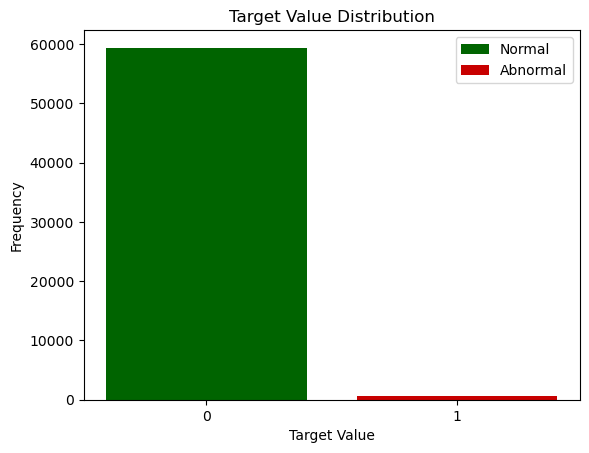

In [17]:
target_counter = Counter(df_train_binary['Target'])
plt.bar(list(target_counter.keys())[0], list(target_counter.values())[0], label="Normal", color=(0.0, 100/255, 0.0))
plt.bar(list(target_counter.keys())[1], list(target_counter.values())[1], label="Abnormal", color=(200/255, 0.0, 0.0))
plt.xticks([0, 1])
plt.title('Target Value Distribution')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

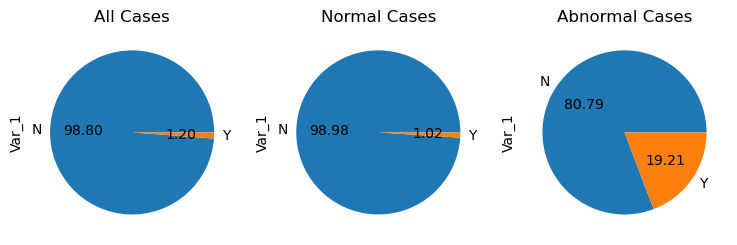

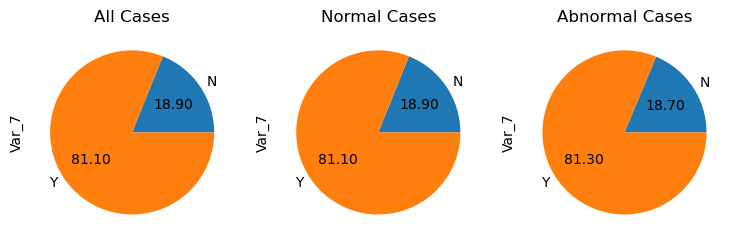

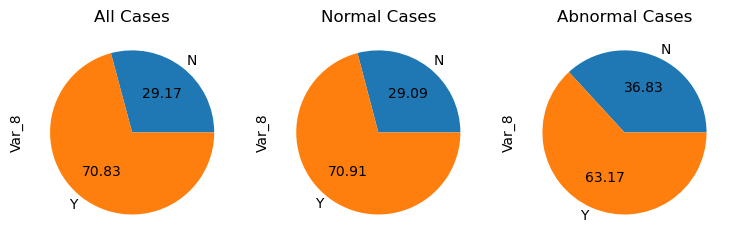

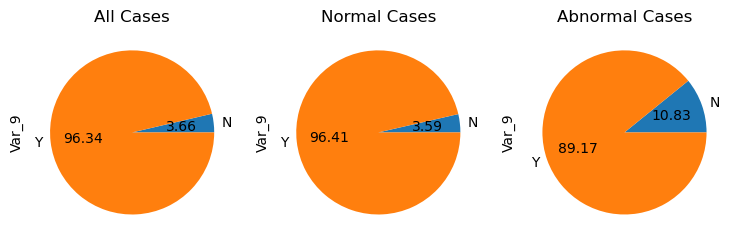

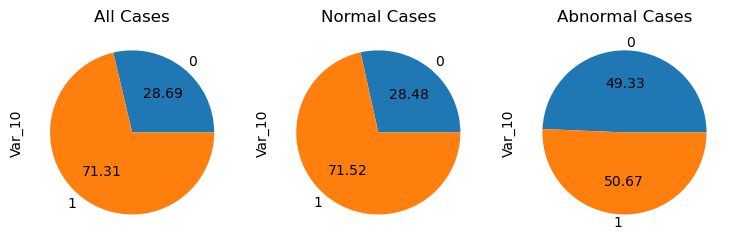

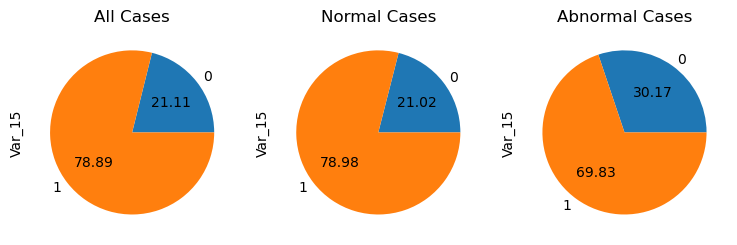

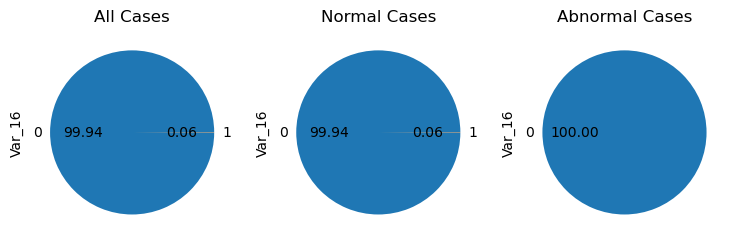

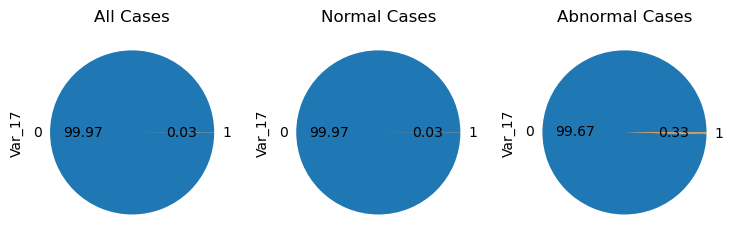

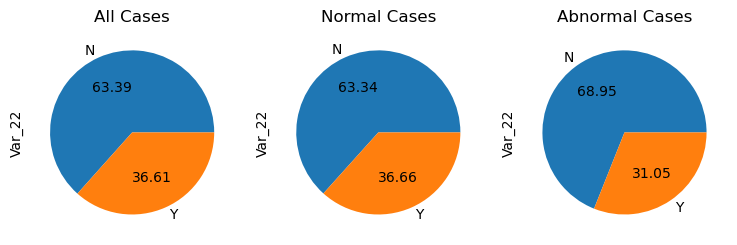

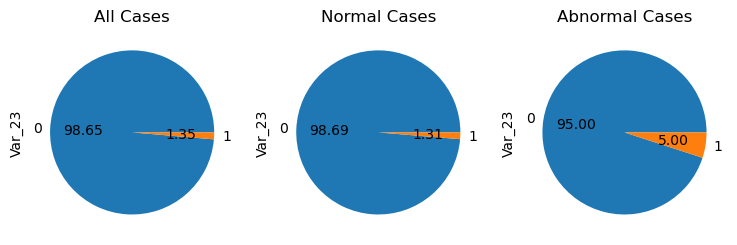

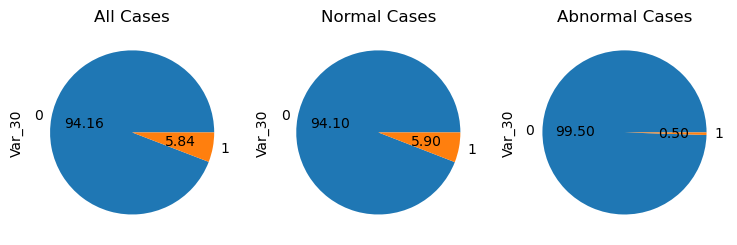

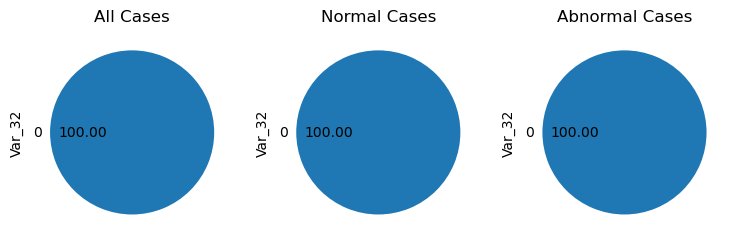

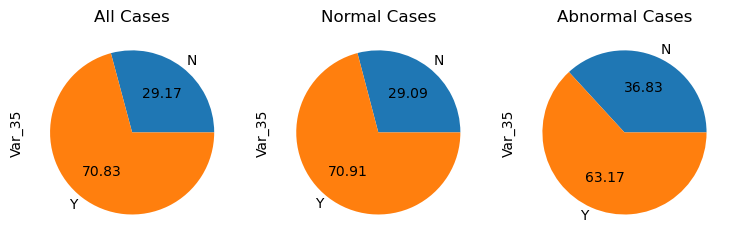

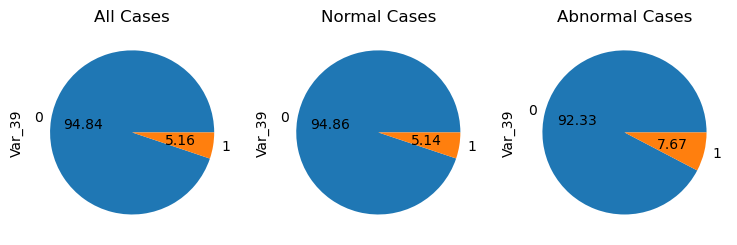

In [18]:
for x in binary_variables:
    plt.figure(figsize = (9, 3))
    plt.subplot(1, 3, 1)
    df_train_binary.groupby(x)[x].count().plot.pie(autopct = '%.2f', title = 'All Cases')
    plt.subplot(1, 3, 2)
    df_train_binary[df_train_binary.Target == 0].groupby(x)[x].count().plot.pie(autopct = '%.2f', title = 'Normal Cases')
    plt.subplot(1, 3, 3)
    df_train_binary[df_train_binary.Target == 1].groupby(x)[x].count().plot.pie(autopct = '%.2f', title = 'Abnormal Cases')
    plt.savefig('./Figures/{}_dist.png'.format(x))
    plt.show()

In [8]:
for x in binary_variables:
    print(x, ':' , X_train[x].nunique(), '|', X_train[x].unique())

Var_1 : 2 | ['N' 'Y' nan]
Var_7 : 2 | ['Y' 'N' nan]
Var_8 : 2 | ['Y' 'N']
Var_9 : 2 | ['Y' 'N']
Var_10 : 2 | [1 0]
Var_15 : 2 | [1 0]
Var_16 : 2 | [0 1]
Var_17 : 2 | [0 1]
Var_22 : 2 | ['N' 'Y' nan]
Var_23 : 2 | [0 1]
Var_30 : 2 | [0 1]
Var_32 : 1 | [0]
Var_35 : 2 | ['Y' 'N']
Var_39 : 2 | [0 1]


In [9]:
binary_variables.remove('Var_16') # No need
binary_variables.remove('Var_17') # No need
binary_variables.remove('Var_32') # Only 1 value

In [10]:
null_list = ['Var_1','Var_7','Var_22']
for x in null_list:
    mode = X_train[x].mode().values[0]
    X_train[x].fillna(mode, inplace = True)
    X_val[x].fillna(mode, inplace = True)
    X_test[x].fillna(mode, inplace = True)

In [11]:
YN_mapping = {'Y': 1, 'N': 0}
YN_list = ['Var_1','Var_7','Var_8','Var_9','Var_22','Var_35']

for x in YN_list:
    X_train[x] = X_train[x].map(YN_mapping)
    X_val[x] = X_val[x].map(YN_mapping)
    X_test[x] = X_test[x].map(YN_mapping)

In [12]:
X_train[binary_variables] = X_train[binary_variables].astype(float)
X_val[binary_variables] = X_val[binary_variables].astype(float)
X_test[binary_variables] = X_test[binary_variables].astype(float)

In [13]:
X_train[binary_variables].head()

,Var_1,Var_7,Var_8,Var_9,Var_10,Var_15,Var_22,Var_23,Var_30,Var_35,Var_39
60075,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
27225,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
403,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00
27953,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
74481,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00


In [14]:
X_train[binary_variables].info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 60075 to 62340
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var_1   60000 non-null  float64
 1   Var_7   60000 non-null  float64
 2   Var_8   60000 non-null  float64
 3   Var_9   60000 non-null  float64
 4   Var_10  60000 non-null  float64
 5   Var_15  60000 non-null  float64
 6   Var_22  60000 non-null  float64
 7   Var_23  60000 non-null  float64
 8   Var_30  60000 non-null  float64
 9   Var_35  60000 non-null  float64
 10  Var_39  60000 non-null  float64
dtypes: float64(11)
memory usage: 5.5 MB


In [15]:
X_train.drop(['Var_16','Var_17','Var_32'], axis = 1, inplace = True)
X_val.drop(['Var_16','Var_17','Var_32'], axis = 1, inplace = True)
X_test.drop(['Var_16','Var_17','Var_32'], axis = 1, inplace = True)

In [16]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 37), (60000,), (7500, 37), (7500,), (7500, 37), (7500,))

In [17]:
X_train.to_pickle('./Data/X_train_only_binary_preprocessed.pkl')
y_train.to_pickle('./Data/y_train_only_binary_preprocessed.pkl')
X_val.to_pickle('./Data/X_val_only_binary_preprocessed.pkl')
y_val.to_pickle('./Data/y_val_only_binary_preprocessed.pkl')
X_test.to_pickle('./Data/X_test_only_binary_preprocessed.pkl')
y_test.to_pickle('./Data/y_test_only_binary_preprocessed.pkl')

<a id='section1.2'></a>
### 4. Categorical Variables:

<style>
td {
  font-size: 12px
}
</style>

**Variable** | **Description**
:---|:---
**Var_2** | Customer GBF (bilmiyoruz)
**Var_21** | Worst Card Status ALL (En k�t� kredi kartinin durumu)
**Var_27** | Residential Status (Ikamet Tipi)
**Var_28** | Max Delinquency Status L6M (En �ok gecikme durumu son 6 ay)
**Var_31** | Current Payment Status (�deme durumu)
**Var_33** | Home adress district code (Posta kodu)
**Var_34** | Level of Education (Egitim d�zeyi)
**Var_40** | Preapproval_Credit_Type (Sillllll!!!!)

In [3]:
X_train = pd.read_pickle('./Data/X_train_only_binary_preprocessed.pkl')
y_train = pd.read_pickle('./Data/y_train_only_binary_preprocessed.pkl')
X_val = pd.read_pickle('./Data/X_val_only_binary_preprocessed.pkl')
y_val = pd.read_pickle('./Data/y_val_only_binary_preprocessed.pkl')
X_test = pd.read_pickle('./Data/X_test_only_binary_preprocessed.pkl')
y_test = pd.read_pickle('./Data/y_test_only_binary_preprocessed.pkl')

In [4]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 37), (60000,), (7500, 37), (7500,), (7500, 37), (7500,))

In [5]:
cat_variables = ['Var_2', 'Var_21', 'Var_27', 'Var_28', 'Var_31', 'Var_33', 'Var_34', 'Var_40']	

In [6]:
df_train_cat = X_train[cat_variables]
df_train_cat['Target'] = y_train

In [7]:
X_train[cat_variables].head()

,Var_2,Var_21,Var_27,Var_28,Var_31,Var_33,Var_34,Var_40
60075,NaN,N,1.00,0.00,0,0.00,U,NaN
27225,X,N,1.00,0.00,NaN,15.00,L,NaN
403,X,N,5.00,0.00,0,36.00,L,NaN
27953,G,NaN,5.00,0.00,0,7.00,L,NaN
74481,G,NaN,1.00,NaN,0,3.00,L,NaN


In [8]:
X_train[cat_variables].info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 60075 to 62340
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var_2   58474 non-null  object 
 1   Var_21  39184 non-null  object 
 2   Var_27  55513 non-null  float64
 3   Var_28  47276 non-null  float64
 4   Var_31  31190 non-null  object 
 5   Var_33  58907 non-null  float64
 6   Var_34  56582 non-null  object 
 7   Var_40  5 non-null      object 
dtypes: float64(3), object(5)
memory usage: 4.1+ MB


In [24]:
for x in ['Var_2', 'Var_21', 'Var_27', 'Var_28']	:
    X_train[x].fillna('Null', inplace = True)
    X_val[x].fillna('Null', inplace = True)
    X_test[x].fillna('Null', inplace = True)

In [26]:
for x in ['Var_31']:
    X_train[x].fillna('0', inplace = True)
    X_val[x].fillna('0', inplace = True)
    X_test[x].fillna('0', inplace = True)

In [27]:
for x in ['Var_33', 'Var_34']:
    mode = X_train[x].mode().values[0]
    X_train[x].fillna(mode, inplace = True)
    X_val[x].fillna(mode, inplace = True)
    X_test[x].fillna(mode, inplace = True)
	

In [28]:
X_train[cat_variables].info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 60075 to 62340
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var_2   60000 non-null  object 
 1   Var_21  60000 non-null  object 
 2   Var_27  60000 non-null  object 
 3   Var_28  60000 non-null  object 
 4   Var_31  60000 non-null  object 
 5   Var_33  60000 non-null  float64
 6   Var_34  60000 non-null  object 
 7   Var_40  5 non-null      object 
dtypes: float64(1), object(7)
memory usage: 4.1+ MB


In [29]:
for x in cat_variables:
    print(x, ':' , X_train[x].nunique(), '|', X_train[x].unique())

Var_2 : 5 | ['Null' 'X' 'G' 'I' 'B']
Var_21 : 4 | ['N' 'Null' 'G' 'D']
Var_27 : 6 | [1.0 5.0 2.0 3.0 4.0 'Null']
Var_28 : 7 | [0.0 'Null' 2.0 3.0 4.0 5.0 7.0]
Var_31 : 7 | ['0' '1' 'U' '3' '2' '4' '6']
Var_33 : 43 | [ 0. 15. 36.  7.  3.  5. 21.  8. 19. 13. 14. 16. 40. 20. 30.  2. 12.  1.
  9. 10. 11.  4. 25. 18.  6. 33. 26. 27. 23. 22. 17. 29. 24. 34. 31. 41.
 35. 32. 37. 28. 39. 38. 42.]
Var_34 : 6 | ['U' 'L' 'O' 'I' 'N' 'Y']
Var_40 : 3 | [nan 'F' 'M' 'S']


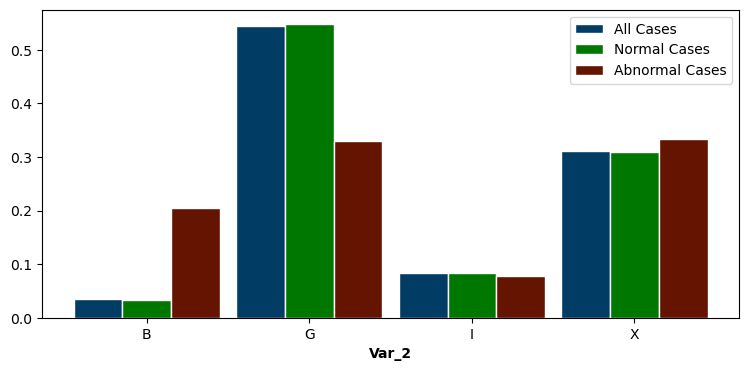

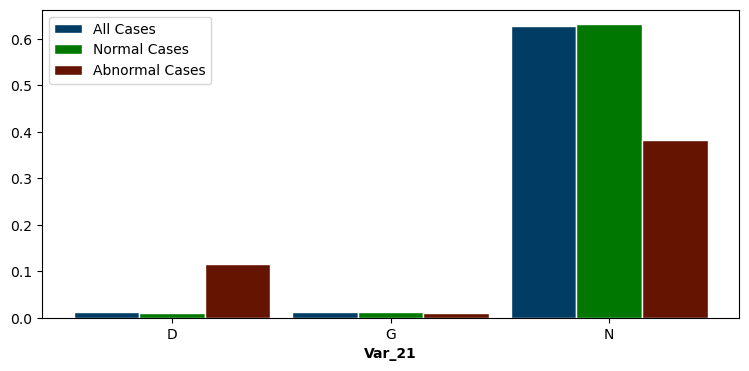

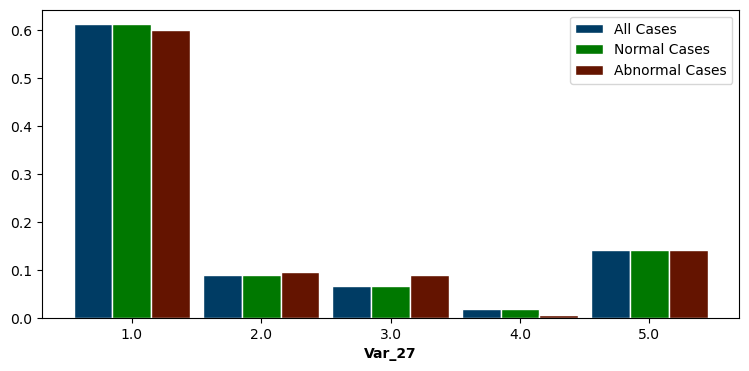

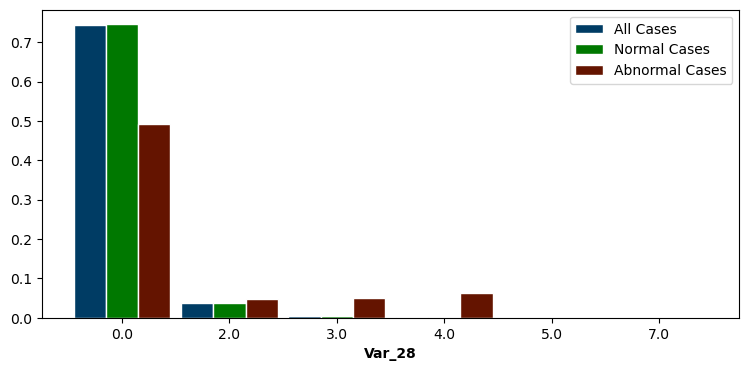

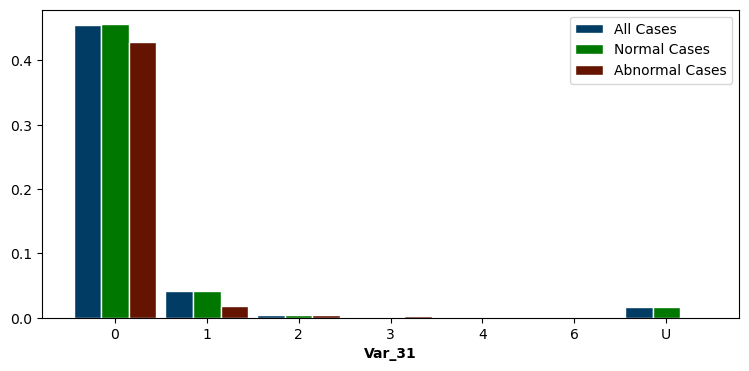

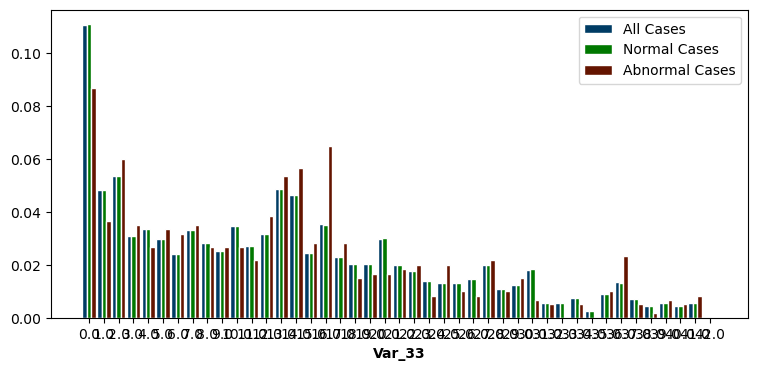

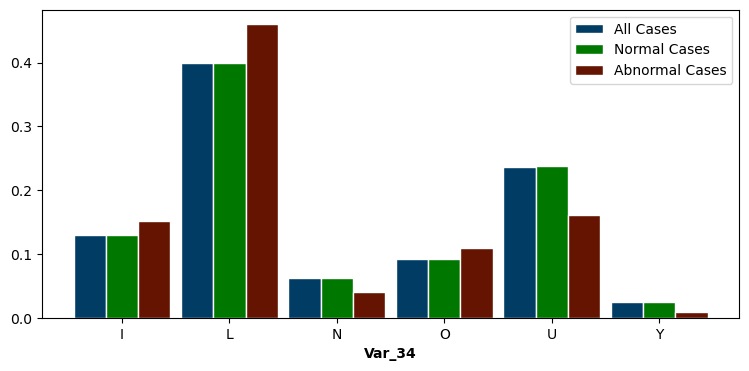

In [40]:
import numpy as np
import matplotlib.pyplot as plt

for x in cat_variables:
    plt.figure(figsize = (9, 4))

    counts1 = df_train_cat.groupby(x)[x].count()/df_train_cat.shape[0]
    counts2 = df_train_cat[df_train_cat.Target==0].groupby(x)[x].count()/df_train_cat[df_train_cat.Target==0].shape[0]
    counts3 = df_train_cat[df_train_cat.Target==1].groupby(x)[x].count()/df_train_cat[df_train_cat.Target==1].shape[0]

    counts = pd.DataFrame()
    counts['1'] = counts1
    counts['2'] = counts2
    counts['3'] = counts3

    counts.fillna(0, inplace = True)

    barWidth = 0.3
    # set heights of bars
    bars1 = counts['1'].values
    bars2 = counts['2'].values
    bars3 = counts['3'].values
    
    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    
    # Make the plot
    plt.bar(r1, bars1, color = (0.0, 60/255, 100/255), width=barWidth, edgecolor='white', label='All Cases')
    plt.bar(r2, bars2, color = (0.0, 120/255, 0.0), width=barWidth, edgecolor='white', label='Normal Cases')
    plt.bar(r3, bars3, color = (100/255, 20/255, 0.0), width=barWidth, edgecolor='white', label='Abnormal Cases')
    
    # Add xticks on the middle of the group bars
    plt.xlabel(x, fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars1))], counts.index.values)
    
    # Create legend & Show graphic
    plt.legend()
    plt.show()

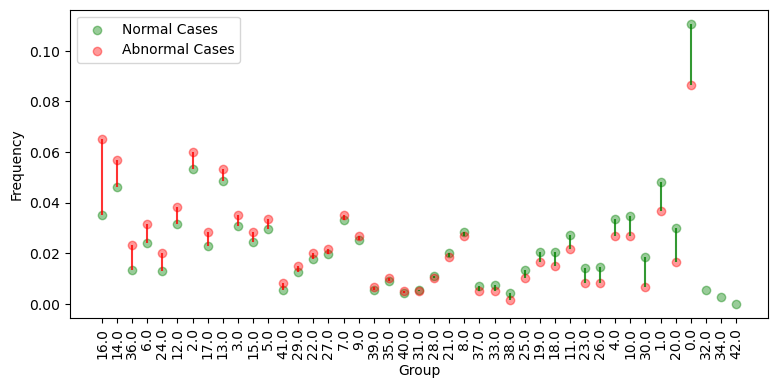

In [90]:
plt.figure(figsize = (9, 4))
# Create a dataframe
value1=df_train_cat[df_train_cat.Target==0].groupby('Var_33')['Var_33'].count()/df_train_cat[df_train_cat.Target==0].shape[0]
value2=df_train_cat[df_train_cat.Target==1].groupby('Var_33')['Var_33'].count()/df_train_cat[df_train_cat.Target==1].shape[0]

df = pd.DataFrame({'group':value1.index.values, 'value1':value1 , 'value2':value2 })

df['Difference'] = df['value1'] - df['value2']
 
# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='Difference')
my_range=range(1,len(df.index)+1)

# The horizontal plot is made using the hline function

plt.vlines(x=range(1,22), ymin=ordered_df.iloc[0:21,1], ymax=ordered_df.iloc[0:21,2], color='red', alpha=0.8)
plt.vlines(x=range(22,44), ymin=ordered_df.iloc[21:43,1], ymax=ordered_df.iloc[21:43,2], color='green', alpha=0.8)
        
plt.scatter(my_range, ordered_df['value1'], color='green', alpha=0.4, label='Normal Cases')
plt.scatter(my_range, ordered_df['value2'], color='red', alpha=0.4 , label='Abnormal Cases')
plt.legend()
 
# Add title and axis names
plt.xticks(my_range,ordered_df['group'], rotation = 90)
plt.xlabel('Group')
plt.ylabel('Frequency')

# Show the graph
plt.show()

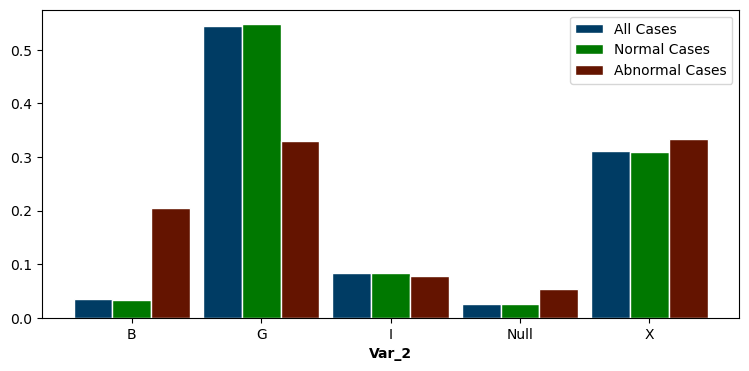

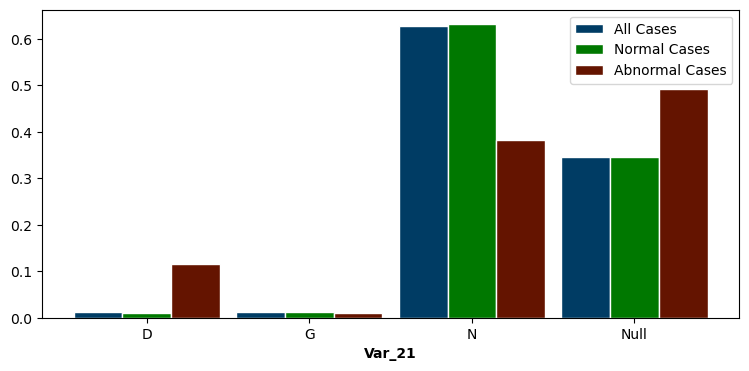

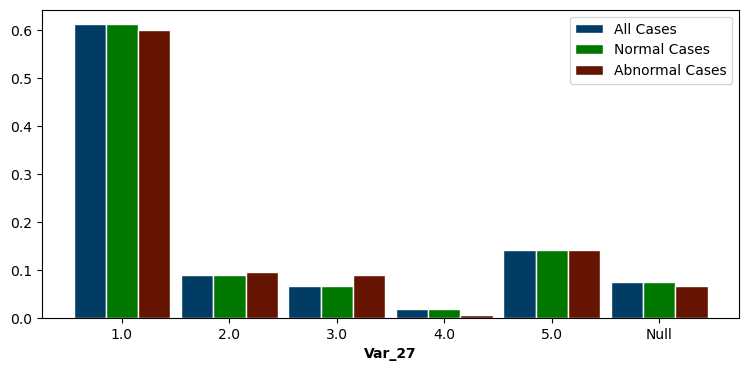

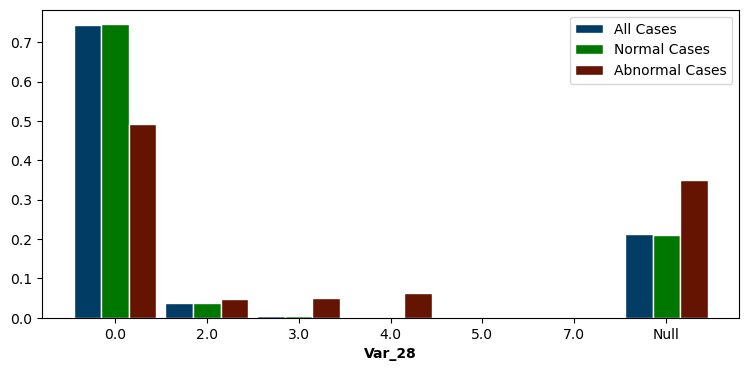

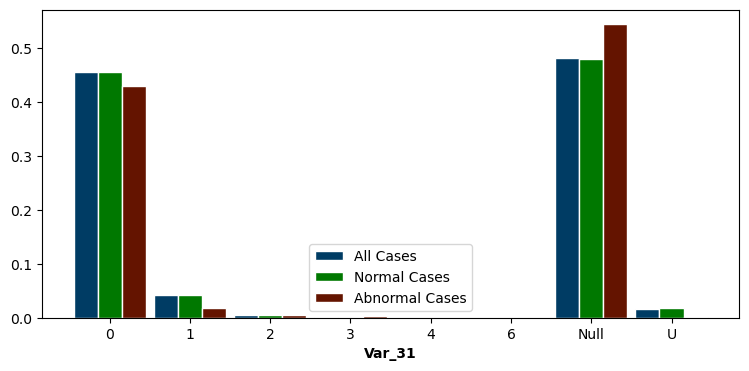

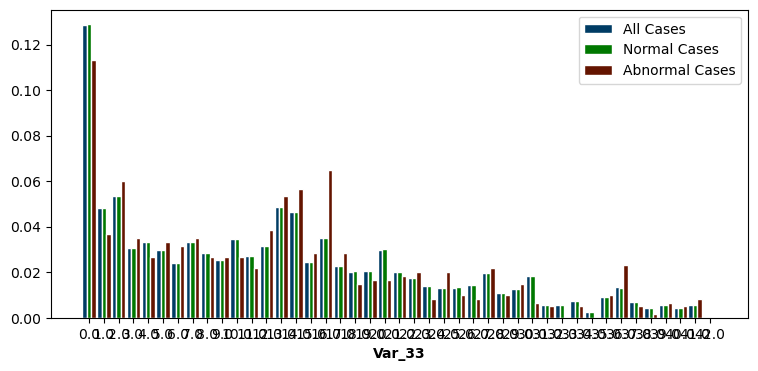

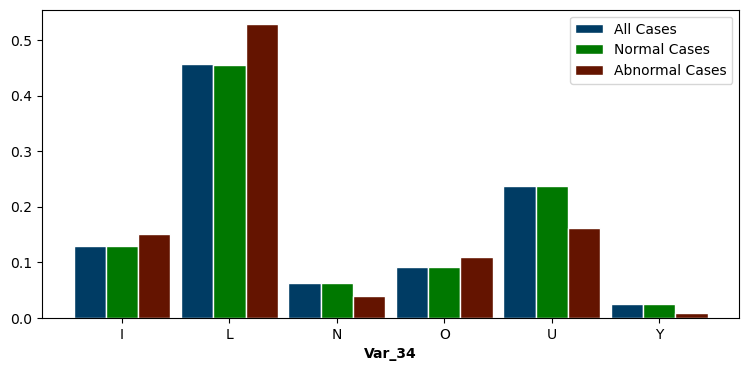

In [41]:
import numpy as np
import matplotlib.pyplot as plt

for x in cat_variables:
    plt.figure(figsize = (9, 4))

    counts1 = X_train.groupby(x)[x].count()/X_train.shape[0]
    counts2 = X_train[y_train==0].groupby(x)[x].count()/X_train[y_train==0].shape[0]
    counts3 = X_train[y_train==1].groupby(x)[x].count()/X_train[y_train==1].shape[0]

    counts = pd.DataFrame()
    counts['1'] = counts1
    counts['2'] = counts2
    counts['3'] = counts3

    counts.fillna(0, inplace = True)

    barWidth = 0.3
    # set heights of bars
    bars1 = counts['1'].values
    bars2 = counts['2'].values
    bars3 = counts['3'].values
    
    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    
    # Make the plot
    plt.bar(r1, bars1, color = (0.0, 60/255, 100/255), width=barWidth, edgecolor='white', label='All Cases')
    plt.bar(r2, bars2, color = (0.0, 120/255, 0.0), width=barWidth, edgecolor='white', label='Normal Cases')
    plt.bar(r3, bars3, color = (100/255, 20/255, 0.0), width=barWidth, edgecolor='white', label='Abnormal Cases')
    
    # Add xticks on the middle of the group bars
    plt.xlabel(x, fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars1))], counts.index.values)
    
    # Create legend & Show graphic
    plt.legend()
    plt.savefig('./Figures/{}_dist.png'.format(x))
    plt.show()

In [30]:
TE = TargetEncoder(verbose = 0, cols = cat_variables, drop_invariant=False, return_df=True, min_samples_leaf=100, smoothing=1.0)
TE.fit(X = X_train, y = y_train)
X_train = TE.transform(X_train)
X_val = TE.transform(X_val)
X_test = TE.transform(X_test)

In [31]:
df_train_cat[cat_variables].head()

,Var_2,Var_21,Var_27,Var_28,Var_31,Var_33,Var_34,Var_40
60075,NaN,N,1.00,0.00,0,0.00,U,NaN
27225,X,N,1.00,0.00,NaN,15.00,L,NaN
403,X,N,5.00,0.00,0,36.00,L,NaN
27953,G,NaN,5.00,0.00,0,7.00,L,NaN
74481,G,NaN,1.00,NaN,0,3.00,L,NaN


In [32]:
X_train[cat_variables].head()

,Var_2,Var_21,Var_27,Var_28,Var_31,Var_33,Var_34,Var_40
60075,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01
27225,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
403,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01
27953,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
74481,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01


In [33]:
X_train.drop('Var_40', axis = 1, inplace = True)
X_val.drop('Var_40', axis = 1, inplace = True)
X_test.drop('Var_40', axis = 1, inplace = True)

In [34]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 36), (60000,), (7500, 36), (7500,), (7500, 36), (7500,))

In [35]:
X_train.to_pickle('./Data/X_train_binary_cat_preprocessed.pkl')
y_train.to_pickle('./Data/y_train_binary_cat_preprocessed.pkl')
X_val.to_pickle('./Data/X_val_binary_cat_preprocessed.pkl')
y_val.to_pickle('./Data/y_val_binary_cat_preprocessed.pkl')
X_test.to_pickle('./Data/X_test_binary_cat_preprocessed.pkl')
y_test.to_pickle('./Data/y_test_binary_cat_preprocessed.pkl')

<a id='section1.3'></a>
### 5. Numerical Variables: ###


<style>
td {
  font-size: 12px
}
</style>

**Variable** | **Description**
:---|:---
**Var_3** | CC_Num_of_application_L6M + LO_Num_of_application_L6M + MO_Num_of_application_L6M + OD_Num_of_application_L6M (CC=Creadit Card,LO=Kredi basvurusu,OD=OverDraft(KMH)(Son 6 ayda bankadan ka� **kere para istedi.))
**Var_4** | KKB Bureau Score(Kredi Skoru, diger degiskenlerle baglantili (korelasyon dikkat!!!))
**Var_5** | CC Total Payment of all Credit cards (Toplam kredi kartina yaptigi �deme)
**Var_6** | CC_Num_of_application_L1M + LO_Num_of_application_L1M + OD_Num_of_application_L1M (Son 1 ayda bankadan ka� kere para istedi.)
**Var_11** | Monthly Family Income (Aile geliri aylik)
**Var_12** | OD Number of months in 1 delay_L24M (OverDraft 24 ayin ka�inda 1 kere gecikme sayisi)
**Var_13** | OD Number of months in 2 delay_L12M (OverDraft 12 ayin ka�inda 2 kere gecikme sayisi)
**Var_14** | CC Number of months in 2 delay_L24M (CreditDraft 24 ayin ka�inda 2 kere gecikme sayisi)
**Var_18** | CC Tot Limit YTL (Toplam Kredi Karti Limiti)
**Var_19** | Total_of_Monthly_Instalment / Total_Assets (D�s�k iyi )
**Var_20** | CC_Total_Payment_of_all_Credit_cards / CC_Total_Balance_of_All_Credit_Cards (�deme/Bakiye)
**Var_24** | GUA_Num Unpaid Cheques L6M (Son alti ayda �denmemis �ek adedi)
**Var_25** | Number of Limit Increase Rejects in L3M (Son 3 ayda limit artirma reddi sayisi)
**Var_26** | Total_of_Monthly_Instalment / Monthly Net Income (Aylik toplam �deme/Aylik net gelir)
**Var_29** | Num Unpaid Notes L7M_L12M (�denmemis senet sayisi bir �nceki ay)
**Var_36** | LO Tot Balance in Litigation (Davalik olan para miktari (icra))
**Var_37** | Num Unpaid Cheques L13M-L24M (ge�en sene �denmeyen �ek sayisi)
**Var_38** | MO_Maximum_Mortgage_Limit / Monthly Net Income (Kredi limiti/Aylik gelir)


In [9]:
X_train = pd.read_pickle('./Data/X_train_binary_cat_preprocessed.pkl')
y_train = pd.read_pickle('./Data/y_train_binary_cat_preprocessed.pkl')
X_val = pd.read_pickle('./Data/X_val_binary_cat_preprocessed.pkl')
y_val = pd.read_pickle('./Data/y_val_binary_cat_preprocessed.pkl')
X_test = pd.read_pickle('./Data/X_test_binary_cat_preprocessed.pkl')
y_test = pd.read_pickle('./Data/y_test_binary_cat_preprocessed.pkl')

In [10]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 36), (60000,), (7500, 36), (7500,), (7500, 36), (7500,))

In [11]:
num_variables = ['Var_3', 'Var_4', 'Var_5', 'Var_6', 'Var_11', 'Var_12', 'Var_13', 'Var_14', 'Var_18', 'Var_19', 'Var_20', 'Var_24', 'Var_25', 'Var_26', 'Var_29', 'Var_36', 'Var_37', 'Var_38']

In [12]:
X_train[num_variables].head()

,Var_3,Var_4,Var_5,Var_6,Var_11,Var_12,Var_13,Var_14,Var_18,Var_19,Var_20,Var_24,Var_25,Var_26,Var_29,Var_36,Var_37,Var_38
60075,0.00,0.00,0.00,0.00,"2,500.00",NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00
27225,5.00,987.00,0.00,1.00,"25,000.00",NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,0.28,0.00,0.00,0.00,0.00
403,4.00,"1,021.00",900.00,1.00,"1,960.00",NaN,NaN,NaN,"6,400.00",0.11,0.30,0.00,NaN,0.33,0.00,0.00,0.00,0.00
27953,4.00,"1,589.00","1,055.00",1.00,"1,400.00",NaN,NaN,NaN,"12,000.00",0.00,0.79,0.00,NaN,0.00,0.00,0.00,0.00,0.00
74481,4.00,"1,261.00","3,600.00",2.00,"2,177.00",NaN,NaN,NaN,"24,460.00",0.00,0.17,0.00,NaN,0.00,0.00,0.00,0.00,0.00


In [13]:
X_train[num_variables].describe()

,Var_3,Var_4,Var_5,Var_6,Var_11,Var_12,Var_13,Var_14,Var_18,Var_19,Var_20,Var_24,Var_25,Var_26,Var_29,Var_36,Var_37,Var_38
count,"59,628.00","59,595.00","59,595.00","59,628.00","59,599.00","1,696.00","1,696.00","1,940.00","59,595.00","59,628.00","59,628.00","59,614.00","7,704.00","59,628.00","59,614.00","59,611.00","59,614.00","59,610.00"
mean,3.08,"1,234.60","1,472.84",0.85,"25,932.73",1.75,0.15,0.71,"11,083.78",29.63,1.42,0.00,0.06,0.11,0.00,19.44,0.00,3.99
std,3.74,339.94,"4,396.15",1.26,"5,285,876.95",3.78,0.66,1.76,"22,034.17",193.75,71.16,0.14,0.30,3.70,0.04,939.33,0.52,225.97
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,"1,095.00",8.00,0.00,"1,625.50",0.00,0.00,0.00,"1,500.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2.00,"1,268.00",500.00,0.00,"2,500.00",0.00,0.00,0.00,"5,000.00",0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,4.00,"1,432.00","1,445.00",1.00,"4,200.00",2.00,0.00,0.00,"11,880.00",0.00,0.42,0.00,0.00,0.13,0.00,0.00,0.00,0.00
max,112.00,"1,900.00","404,590.00",39.00,"1,290,438,565.00",34.00,15.00,26.00,"836,500.00","13,868.00","15,994.00",33.00,7.00,901.00,6.00,"146,810.00",127.00,"55,000.00"


In [88]:
X_train[num_variables].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 60075 to 62340
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var_3   59628 non-null  float64
 1   Var_4   59595 non-null  float64
 2   Var_5   59595 non-null  float64
 3   Var_6   59628 non-null  float64
 4   Var_11  59599 non-null  float64
 5   Var_12  1696 non-null   float64
 6   Var_13  1696 non-null   float64
 7   Var_14  1940 non-null   float64
 8   Var_18  59595 non-null  float64
 9   Var_19  59628 non-null  float64
 10  Var_20  59628 non-null  float64
 11  Var_24  59614 non-null  float64
 12  Var_25  7704 non-null   float64
 13  Var_26  59628 non-null  float64
 14  Var_29  59614 non-null  float64
 15  Var_36  59611 non-null  float64
 16  Var_37  59614 non-null  float64
 17  Var_38  59610 non-null  float64
dtypes: float64(18)
memory usage: 8.7 MB


In [14]:
zero_impute = ['Var_12','Var_13','Var_14','Var_24','Var_25','Var_29','Var_36','Var_37']
for x in zero_impute:
    X_train[x].fillna(0, inplace = True)
    X_val[x].fillna(0, inplace = True)
    X_test[x].fillna(0, inplace = True)

In [15]:
median_impute = ['Var_3','Var_4','Var_5','Var_6','Var_11','Var_18','Var_19','Var_20','Var_26','Var_38']
for x in median_impute:
    median = X_train[x].median()
    X_train[x].fillna(median, inplace = True)
    X_val[x].fillna(median, inplace = True)
    X_test[x].fillna(median, inplace = True)

In [17]:
X_train.to_pickle('./Data/X_train_all_imputed.pkl')
y_train.to_pickle('./Data/y_train_all_imputed.pkl')
X_val.to_pickle('./Data/X_val_all_imputed.pkl')
y_val.to_pickle('./Data/y_val_all_imputed.pkl')
X_test.to_pickle('./Data/X_test_all_imputed.pkl')
y_test.to_pickle('./Data/y_test_all_imputed.pkl')

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 60075 to 62340
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var_1   60000 non-null  float64
 1   Var_2   60000 non-null  float64
 2   Var_3   60000 non-null  float64
 3   Var_4   60000 non-null  float64
 4   Var_5   60000 non-null  float64
 5   Var_6   60000 non-null  float64
 6   Var_7   60000 non-null  float64
 7   Var_8   60000 non-null  float64
 8   Var_9   60000 non-null  float64
 9   Var_10  60000 non-null  float64
 10  Var_11  60000 non-null  float64
 11  Var_12  60000 non-null  float64
 12  Var_13  60000 non-null  float64
 13  Var_14  60000 non-null  float64
 14  Var_15  60000 non-null  float64
 15  Var_18  60000 non-null  float64
 16  Var_19  60000 non-null  float64
 17  Var_20  60000 non-null  float64
 18  Var_21  60000 non-null  float64
 19  Var_22  60000 non-null  float64
 20  Var_23  60000 non-null  float64
 21  Var_24  60000 non-null  float64

In [92]:
X_train[num_variables].describe()

,Var_3,Var_4,Var_5,Var_6,Var_11,Var_12,Var_13,Var_14,Var_18,Var_19,Var_20,Var_24,Var_25,Var_26,Var_29,Var_36,Var_37,Var_38
count,"60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00"
mean,3.07,"1,234.82","1,466.27",0.85,"25,776.12",0.05,0.00,0.02,"11,042.71",29.44,1.42,0.00,0.01,0.11,0.00,19.32,0.00,3.96
std,3.72,338.80,"4,382.02",1.26,"5,268,183.75",0.70,0.11,0.34,"21,965.33",193.16,70.94,0.14,0.11,3.69,0.04,936.28,0.52,225.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,"1,096.00",10.00,0.00,"1,647.00",0.00,0.00,0.00,"1,500.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2.00,"1,268.00",500.00,0.00,"2,500.00",0.00,0.00,0.00,"5,000.00",0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,4.00,"1,430.00","1,431.00",1.00,"4,150.00",0.00,0.00,0.00,"11,800.00",0.00,0.41,0.00,0.00,0.13,0.00,0.00,0.00,0.00
max,112.00,"1,900.00","404,590.00",39.00,"1,290,438,565.00",34.00,15.00,26.00,"836,500.00","13,868.00","15,994.00",33.00,7.00,901.00,6.00,"146,810.00",127.00,"55,000.00"


In [93]:
X_train_num = X_train[num_variables]

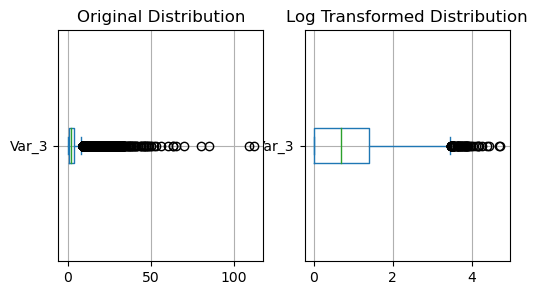

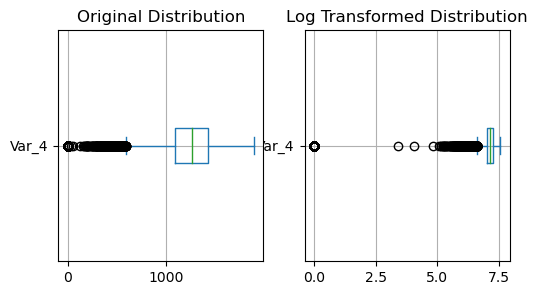

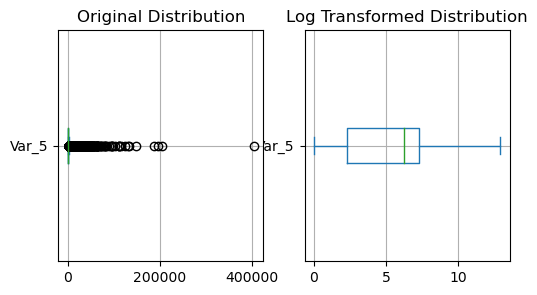

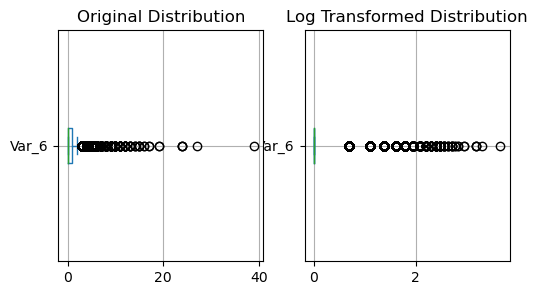

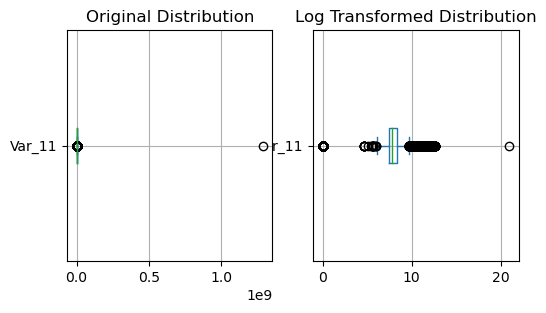

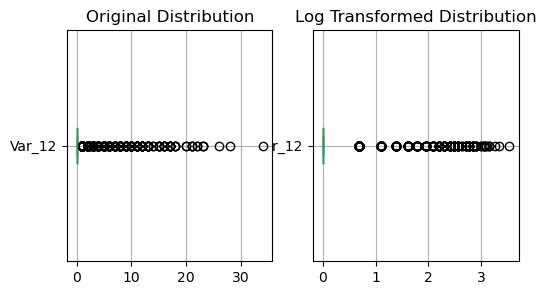

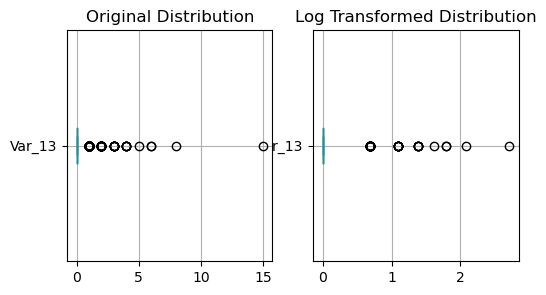

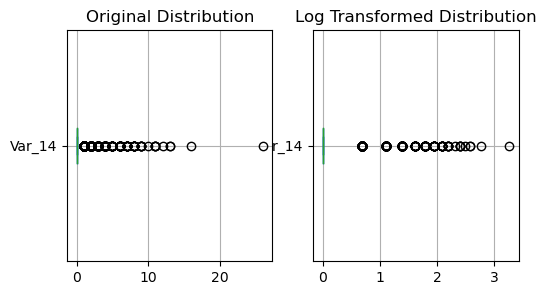

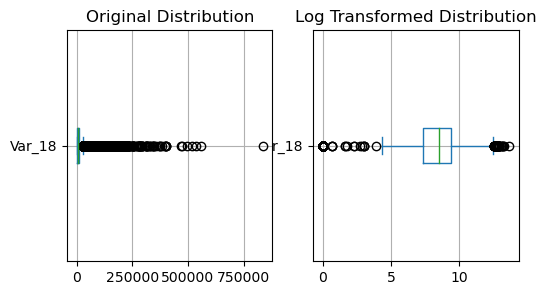

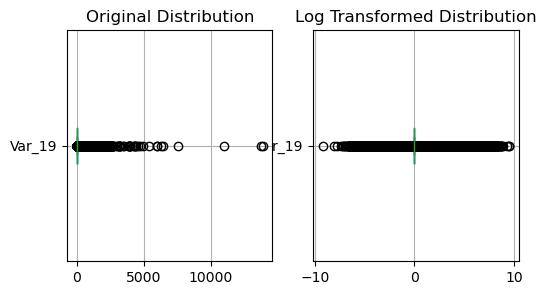

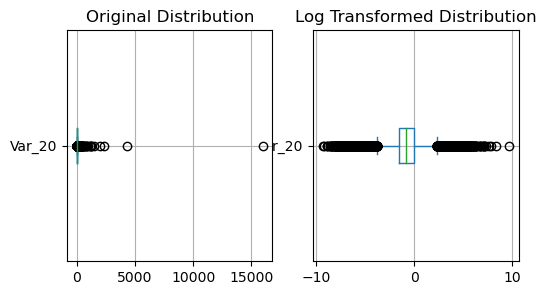

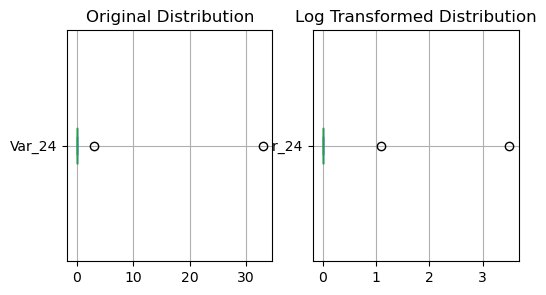

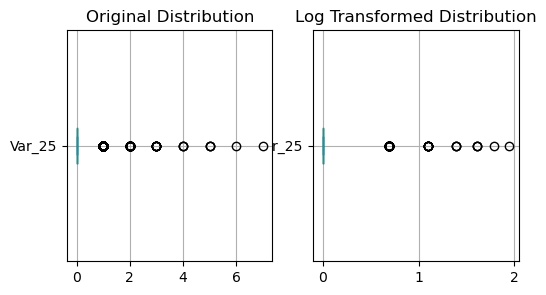

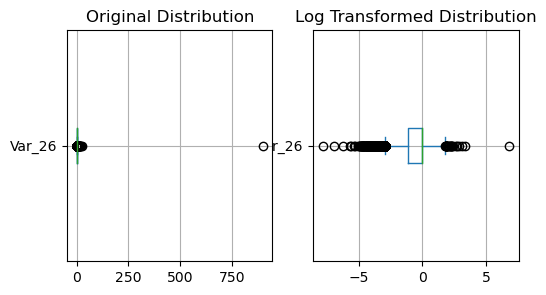

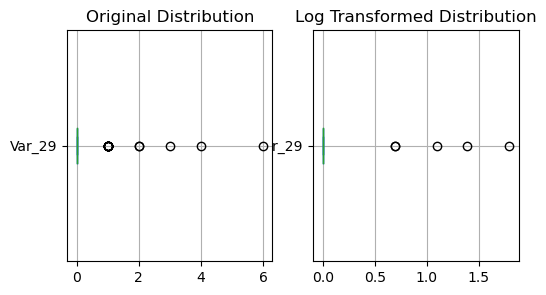

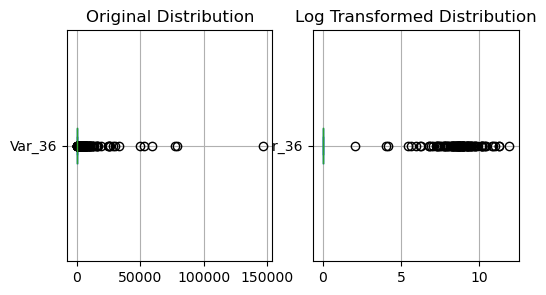

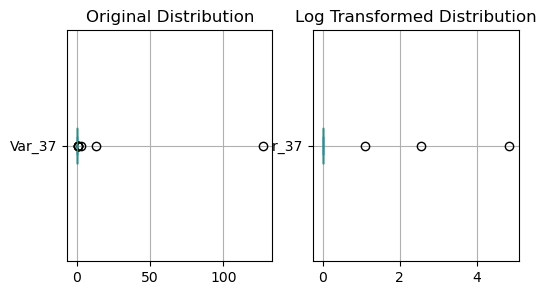

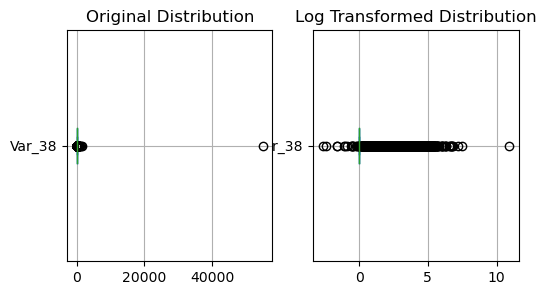

In [65]:
for x in num_variables:    
    plt.figure(figsize=(9,3))
    plt.subplot(1, 3, 2)
    np.log(X_train[x].replace(0,1)).plot.box(vert = False, grid = True,title = 'Log Transformed Distribution')
    plt.subplot(1, 3, 1)
    X_train[x].plot.box(vert = False, grid = True,title = 'Original Distribution')
    plt.show()


In [94]:
right_skewed = ['Var_3', 'Var_5', 'Var_6', 'Var_11', 'Var_12', 'Var_13', 'Var_14', 'Var_18', 'Var_19', 'Var_20', 'Var_24', 'Var_25', 'Var_26', 'Var_29', 'Var_36', 'Var_37', 'Var_38']

In [95]:
for x in right_skewed:
    print(x, ':', skew(X_train[x]), '---', skew(np.log(X_train[x].replace(0, 1))))

Var_3 : 4.372355421013565 --- 0.5957867758442768
Var_5 : 25.369286710119006 --- -0.7347649592559898
Var_6 : 3.3251977474645127 --- 2.1214408460568035
Var_11 : 244.94176332157352 --- -3.501687225242741
Var_12 : 20.765951317358272 --- 14.29431984714132
Var_13 : 61.49411199313674 --- 46.66982653209538
Var_14 : 25.288025294020542 --- 17.22279700456564
Var_18 : 7.64946806322554 --- -1.571888873908745
Var_19 : 25.27464722132182 --- 1.7154771037427907
Var_20 : 196.46905526459696 --- -0.7067451943406761
Var_24 : 242.11910084589843 --- 219.2787122486916
Var_25 : 24.372752232518998 --- 39.33892436095956
Var_26 : 242.2556607057108 --- -1.3672121844703091
Var_29 : 112.55204003225477 --- 129.25105199600824
Var_36 : 97.55392373568793 --- 25.625593085118638
Var_37 : 241.11654931223396 --- 184.88502906029996
Var_38 : 242.66015091960963 --- 2.784598048669242


In [96]:
X_train['Var_24'].value_counts()

0.00     59998
33.00        1
3.00         1
Name: Var_24, dtype: int64

In [97]:
X_train['Var_25'].value_counts()

0.00    59664
1.00      277
2.00       42
3.00        9
5.00        3
4.00        3
6.00        1
7.00        1
Name: Var_25, dtype: int64

In [98]:
X_train['Var_29'].value_counts()

0.00    59983
1.00       12
2.00        2
3.00        1
6.00        1
4.00        1
Name: Var_29, dtype: int64

In [99]:
X_train['Var_37'].value_counts()

0.00      59993
1.00          4
127.00        1
3.00          1
13.00         1
Name: Var_37, dtype: int64

In [100]:
X_train['Var_41'] = X_train['Var_24'] + X_train['Var_29'] + X_train['Var_37']
X_val['Var_41'] = X_val['Var_24'] + X_val['Var_29'] + X_val['Var_37']
X_test['Var_41'] = X_test['Var_24'] + X_test['Var_29'] + X_test['Var_37']

In [101]:
X_train['Var_41'].value_counts()

0.00      59974
1.00         16
3.00          3
2.00          2
127.00        1
6.00          1
13.00         1
33.00         1
4.00          1
Name: Var_41, dtype: int64

In [102]:
X_train.shape, X_val.shape, X_test.shape

((60000, 37), (7500, 37), (7500, 37))

In [103]:
X_train.drop(['Var_24','Var_29','Var_37'], axis = 1, inplace = True)
X_val.drop(['Var_24','Var_29','Var_37'], axis = 1, inplace = True)
X_test.drop(['Var_24','Var_29','Var_37'], axis = 1, inplace = True)

In [104]:
X_train.shape, X_val.shape, X_test.shape

((60000, 34), (7500, 34), (7500, 34))

In [105]:
log_variables = ['Var_3', 'Var_5', 'Var_6', 'Var_11', 'Var_12', 'Var_13', 'Var_14', 'Var_18', 'Var_19', 'Var_20', 'Var_26', 'Var_36', 'Var_38']

for x in log_variables:
    X_train[x] = np.log(X_train[x].replace(0, 1))
    X_val[x] = np.log(X_val[x].replace(0, 1))
    X_test[x] = np.log(X_test[x].replace(0, 1))


In [106]:
X_train.head()

,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_25,Var_26,Var_27,Var_28,Var_30,Var_31,Var_33,Var_34,Var_35,Var_36,Var_38,Var_39,Var_41
60075,0.00,0.02,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,7.82,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.01,1.00,0.00,0.00,0.00,0.00
27225,0.00,0.01,1.61,987.00,0.00,0.00,1.00,1.00,1.00,1.00,10.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,-1.28,0.01,0.01,0.00,0.01,0.01,0.01,1.00,0.00,0.00,0.00,0.00
403,0.00,0.01,1.39,"1,021.00",6.80,0.00,1.00,1.00,1.00,1.00,7.58,0.00,0.00,0.00,1.00,8.76,-2.25,-1.20,0.01,0.00,0.00,0.00,-1.12,0.01,0.01,1.00,0.01,0.02,0.01,1.00,0.00,0.00,0.00,0.00
27953,0.00,0.01,1.39,"1,589.00",6.96,0.00,1.00,1.00,1.00,1.00,7.24,0.00,0.00,0.00,1.00,9.39,0.00,-0.24,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.01,1.00,0.00,0.00,0.00,0.00
74481,0.00,0.01,1.39,"1,261.00",8.19,0.69,1.00,1.00,1.00,0.00,7.69,0.00,0.00,0.00,1.00,10.10,0.00,-1.78,0.01,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.01,0.01,0.01,1.00,0.00,0.00,0.00,0.00


In [107]:
X_train.describe()

,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_25,Var_26,Var_27,Var_28,Var_30,Var_31,Var_33,Var_34,Var_35,Var_36,Var_38,Var_39,Var_41
count,"60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00"
mean,0.01,0.01,0.82,"1,234.82",5.06,0.20,0.81,0.71,0.96,0.71,7.86,0.01,0.00,0.01,0.79,7.50,0.47,-0.89,0.01,0.36,0.01,0.01,-0.56,0.01,0.01,0.06,0.01,0.01,0.01,0.71,0.01,0.33,0.05,0.00
std,0.11,0.01,0.81,338.80,3.11,0.42,0.39,0.45,0.19,0.45,1.15,0.15,0.03,0.09,0.41,3.24,1.73,1.20,0.01,0.48,0.12,0.11,0.90,0.00,0.01,0.23,0.00,0.00,0.00,0.45,0.35,0.97,0.22,0.54
min,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-9.21,-9.35,0.01,0.00,0.00,0.00,-7.82,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,-2.65,0.00,0.00
25%,0.00,0.01,0.00,"1,096.00",2.30,0.00,1.00,0.00,1.00,0.00,7.41,0.00,0.00,0.00,1.00,7.31,0.00,-1.53,0.01,0.00,0.00,0.00,-1.16,0.01,0.01,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.01,0.69,"1,268.00",6.21,0.00,1.00,1.00,1.00,1.00,7.82,0.00,0.00,0.00,1.00,8.52,0.00,-0.81,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.01,1.00,0.00,0.00,0.00,0.00
75%,0.00,0.01,1.39,"1,430.00",7.27,0.00,1.00,1.00,1.00,1.00,8.33,0.00,0.00,0.00,1.00,9.38,0.00,0.00,0.01,1.00,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.01,1.00,0.00,0.00,0.00,0.00
max,1.00,0.06,4.72,"1,900.00",12.91,3.66,1.00,1.00,1.00,1.00,20.98,3.53,2.71,3.26,1.00,13.64,9.54,9.68,0.10,1.00,1.00,7.00,6.80,0.01,0.22,1.00,0.01,0.02,0.01,1.00,11.90,10.92,1.00,127.00


In [108]:
all_columns = list(X_train.columns)

In [109]:
# Here we scale all float variables 0 mean and 1 std dev.

scaler = preprocessing.StandardScaler()
scaler.fit(X_train[all_columns])
X_train[all_columns] = scaler.transform(X_train[all_columns])
X_val[all_columns] = scaler.transform(X_val[all_columns])
X_test[all_columns] = scaler.transform(X_test[all_columns])

In [110]:
X_train.describe()

,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_25,Var_26,Var_27,Var_28,Var_30,Var_31,Var_33,Var_34,Var_35,Var_36,Var_38,Var_39,Var_41
count,"60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00"
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.11,-0.41,-1.01,-3.64,-1.63,-0.47,-2.08,-1.56,-5.13,-1.58,-6.82,-0.08,-0.03,-0.07,-1.93,-2.32,-5.59,-7.02,-0.38,-0.76,-0.12,-0.06,-8.08,-4.87,-0.25,-0.25,-5.32,-3.31,-2.65,-1.56,-0.04,-3.08,-0.23,-0.01
25%,-0.11,-0.41,-1.01,-0.41,-0.89,-0.47,0.48,-1.56,0.19,-1.58,-0.40,-0.08,-0.03,-0.07,0.52,-0.06,-0.27,-0.53,-0.38,-0.76,-0.12,-0.06,-0.67,-0.14,-0.25,-0.25,0.24,-0.67,-1.29,-1.56,-0.04,-0.35,-0.23,-0.01
50%,-0.11,-0.41,-0.15,0.10,0.37,-0.47,0.48,0.64,0.19,0.63,-0.03,-0.08,-0.03,-0.07,0.52,0.32,-0.27,0.07,-0.38,-0.76,-0.12,-0.06,0.62,-0.14,-0.25,-0.25,0.24,0.17,0.64,0.64,-0.04,-0.35,-0.23,-0.01
75%,-0.11,0.08,0.70,0.58,0.71,-0.47,0.48,0.64,0.19,0.63,0.41,-0.08,-0.03,-0.07,0.52,0.58,-0.27,0.74,0.40,1.32,-0.12,-0.06,0.62,0.06,0.17,-0.25,0.24,0.46,0.64,0.64,-0.04,-0.35,-0.23,-0.01
max,9.11,4.98,4.82,1.96,2.53,8.27,0.48,0.64,0.19,0.63,11.37,23.51,88.81,34.33,0.52,1.90,5.24,8.78,8.46,1.32,8.55,63.36,8.18,2.67,15.18,4.01,1.06,2.80,0.82,0.64,33.99,10.94,4.28,235.22


In [111]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 34), (60000,), (7500, 34), (7500,), (7500, 34), (7500,))

In [112]:
X_train.to_pickle('./Data/X_train_preprocessed.pkl')
y_train.to_pickle('./Data/y_train_preprocessed.pkl')
X_val.to_pickle('./Data/X_val_preprocessed.pkl')
y_val.to_pickle('./Data/y_val_preprocessed.pkl')
X_test.to_pickle('./Data/X_test_preprocessed.pkl')
y_test.to_pickle('./Data/y_test_preprocessed.pkl')

In [5]:
X_train = pd.read_pickle('./Data/X_train_preprocessed.pkl')
y_train = pd.read_pickle('./Data/y_train_preprocessed.pkl')
X_val = pd.read_pickle('./Data/X_val_preprocessed.pkl')
y_val = pd.read_pickle('./Data/y_val_preprocessed.pkl')
X_test = pd.read_pickle('./Data/X_test_preprocessed.pkl')
y_test = pd.read_pickle('./Data/y_test_preprocessed.pkl')

In [7]:
num_variables = ['Var_3', 'Var_4', 'Var_5', 'Var_6', 'Var_11', 'Var_12', 'Var_13', 'Var_14', 'Var_18', 'Var_19', 'Var_20', 'Var_24', 'Var_25', 'Var_26', 'Var_29', 'Var_36', 'Var_37', 'Var_38']

In [8]:
X_train_num = X_train[num_variables]

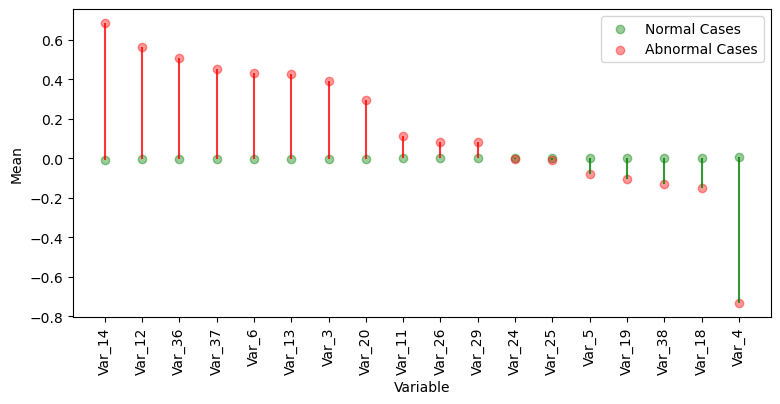

In [9]:
plt.figure(figsize = (9, 4))
# Create a dataframe
value1=X_train_num[y_train == 0].mean()
value2=X_train_num[y_train == 1].mean() 

df = pd.DataFrame({'group':value1.index.values, 'value1':value1 , 'value2':value2 })

df['Difference'] = df['value1'] - df['value2']
 
# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='Difference')
my_range=range(1,len(df.index)+1)

# The horizontal plot is made using the hline function

plt.vlines(x=range(1,12), ymin=ordered_df.iloc[0:11,1], ymax=ordered_df.iloc[0:11,2], color='red', alpha=0.8)
plt.vlines(x=range(12,19), ymin=ordered_df.iloc[11:18,1], ymax=ordered_df.iloc[11:18,2], color='green', alpha=0.8)
        
plt.scatter(my_range, ordered_df['value1'], color='green', alpha=0.4, label='Normal Cases')
plt.scatter(my_range, ordered_df['value2'], color='red', alpha=0.4 , label='Abnormal Cases')
plt.legend()
 
# Add title and axis names
plt.xticks(my_range,ordered_df['group'], rotation = 90)
plt.xlabel('Variable')
plt.ylabel('Mean')

# Show the graph
plt.show()

<a id='section1.4'></a>
### 6. Correlation Check

In [113]:
X_train = pd.read_pickle('./Data/X_train_preprocessed.pkl')
y_train = pd.read_pickle('./Data/y_train_preprocessed.pkl')
X_val = pd.read_pickle('./Data/X_val_preprocessed.pkl')
y_val = pd.read_pickle('./Data/y_val_preprocessed.pkl')
X_test = pd.read_pickle('./Data/X_test_preprocessed.pkl')
y_test = pd.read_pickle('./Data/y_test_preprocessed.pkl')

In [114]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 34), (60000,), (7500, 34), (7500,), (7500, 34), (7500,))

In [115]:
X_train.head()

,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_25,Var_26,Var_27,Var_28,Var_30,Var_31,Var_33,Var_34,Var_35,Var_36,Var_38,Var_39,Var_41
60075,-0.11,1.13,-1.01,-3.64,-1.63,-0.47,0.48,0.64,0.19,0.63,-0.03,-0.08,-0.03,-0.07,0.52,-2.32,-0.27,0.74,-0.38,-0.76,-0.12,-0.06,0.62,-0.14,-0.25,-0.25,0.24,-0.40,-1.29,0.64,-0.04,-0.35,-0.23,-0.01
27225,-0.11,0.08,0.98,-0.73,-1.63,-0.47,0.48,0.64,0.19,0.63,1.96,-0.08,-0.03,-0.07,-1.93,-2.32,-0.27,0.74,-0.38,-0.76,-0.12,-0.06,-0.80,-0.14,-0.25,-0.25,0.24,0.53,0.64,0.64,-0.04,-0.35,-0.23,-0.01
403,-0.11,0.08,0.70,-0.63,0.56,-0.47,0.48,0.64,0.19,0.63,-0.25,-0.08,-0.03,-0.07,0.52,0.39,-1.57,-0.25,-0.38,-0.76,-0.12,-0.06,-0.63,0.06,-0.25,4.01,0.24,2.49,0.64,0.64,-0.04,-0.35,-0.23,-0.01
27953,-0.11,-0.41,0.70,1.05,0.61,-0.47,0.48,0.64,0.19,0.63,-0.54,-0.08,-0.03,-0.07,0.52,0.59,-0.27,0.54,0.40,-0.76,-0.12,-0.06,0.62,0.06,-0.25,-0.25,0.24,0.17,0.64,0.64,-0.04,-0.35,-0.23,-0.01
74481,-0.11,-0.41,0.70,0.08,1.01,1.18,0.48,0.64,0.19,-1.58,-0.15,-0.08,-0.03,-0.07,0.52,0.81,-0.27,-0.73,0.40,-0.76,-0.12,-0.06,0.62,-0.14,0.48,-0.25,0.24,0.46,0.64,0.64,-0.04,-0.35,-0.23,-0.01


In [116]:
X_train.describe()

,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_25,Var_26,Var_27,Var_28,Var_30,Var_31,Var_33,Var_34,Var_35,Var_36,Var_38,Var_39,Var_41
count,"60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00","60,000.00"
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.11,-0.41,-1.01,-3.64,-1.63,-0.47,-2.08,-1.56,-5.13,-1.58,-6.82,-0.08,-0.03,-0.07,-1.93,-2.32,-5.59,-7.02,-0.38,-0.76,-0.12,-0.06,-8.08,-4.87,-0.25,-0.25,-5.32,-3.31,-2.65,-1.56,-0.04,-3.08,-0.23,-0.01
25%,-0.11,-0.41,-1.01,-0.41,-0.89,-0.47,0.48,-1.56,0.19,-1.58,-0.40,-0.08,-0.03,-0.07,0.52,-0.06,-0.27,-0.53,-0.38,-0.76,-0.12,-0.06,-0.67,-0.14,-0.25,-0.25,0.24,-0.67,-1.29,-1.56,-0.04,-0.35,-0.23,-0.01
50%,-0.11,-0.41,-0.15,0.10,0.37,-0.47,0.48,0.64,0.19,0.63,-0.03,-0.08,-0.03,-0.07,0.52,0.32,-0.27,0.07,-0.38,-0.76,-0.12,-0.06,0.62,-0.14,-0.25,-0.25,0.24,0.17,0.64,0.64,-0.04,-0.35,-0.23,-0.01
75%,-0.11,0.08,0.70,0.58,0.71,-0.47,0.48,0.64,0.19,0.63,0.41,-0.08,-0.03,-0.07,0.52,0.58,-0.27,0.74,0.40,1.32,-0.12,-0.06,0.62,0.06,0.17,-0.25,0.24,0.46,0.64,0.64,-0.04,-0.35,-0.23,-0.01
max,9.11,4.98,4.82,1.96,2.53,8.27,0.48,0.64,0.19,0.63,11.37,23.51,88.81,34.33,0.52,1.90,5.24,8.78,8.46,1.32,8.55,63.36,8.18,2.67,15.18,4.01,1.06,2.80,0.82,0.64,33.99,10.94,4.28,235.22


In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 60075 to 62340
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var_1   60000 non-null  float64
 1   Var_2   60000 non-null  float64
 2   Var_3   60000 non-null  float64
 3   Var_4   60000 non-null  float64
 4   Var_5   60000 non-null  float64
 5   Var_6   60000 non-null  float64
 6   Var_7   60000 non-null  float64
 7   Var_8   60000 non-null  float64
 8   Var_9   60000 non-null  float64
 9   Var_10  60000 non-null  float64
 10  Var_11  60000 non-null  float64
 11  Var_12  60000 non-null  float64
 12  Var_13  60000 non-null  float64
 13  Var_14  60000 non-null  float64
 14  Var_15  60000 non-null  float64
 15  Var_18  60000 non-null  float64
 16  Var_19  60000 non-null  float64
 17  Var_20  60000 non-null  float64
 18  Var_21  60000 non-null  float64
 19  Var_22  60000 non-null  float64
 20  Var_23  60000 non-null  float64
 21  Var_25  60000 non-null  float64

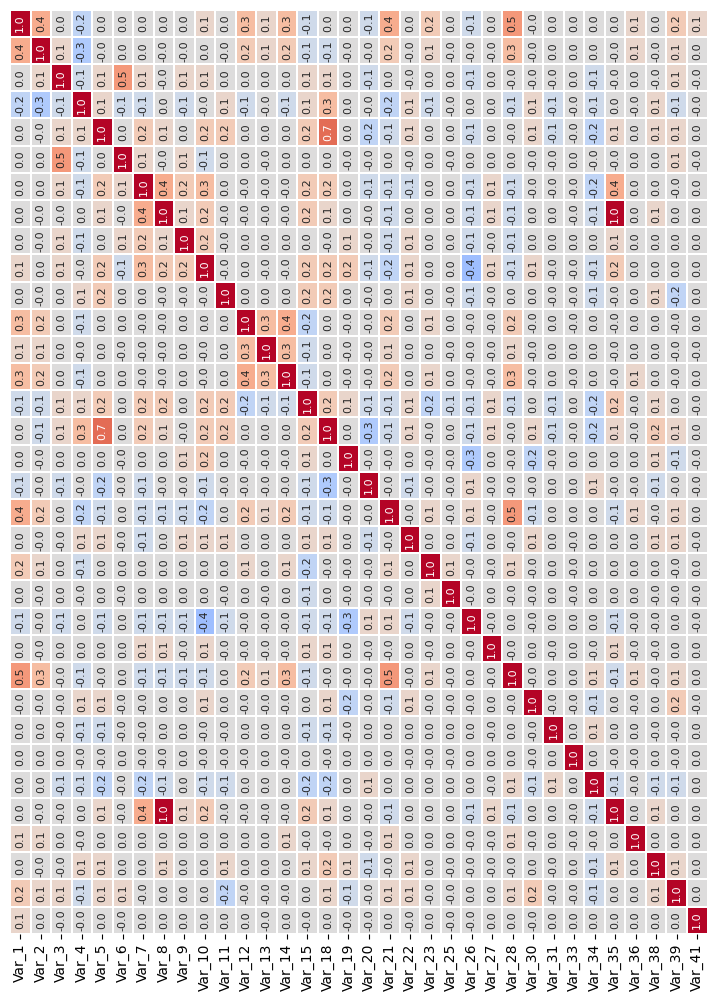

In [139]:
corr = X_train.corr()
 
plt.figure(figsize=(9,12))
fig = sns.heatmap(corr.round(1), cmap='coolwarm', linewidths=.1, annot=True, fmt='.1f', vmin=-1, vmax=1, cbar = False, annot_kws={'rotation': 90, "size": 8},  yticklabels=False)
plt.show()
# The correlation can be tolerated because they are all lower than 0.8

In [140]:
X_train.Var_8.value_counts()

0.64     42499
-1.56    17501
Name: Var_8, dtype: int64

In [141]:
X_train.Var_35.value_counts()

0.64     42499
-1.56    17501
Name: Var_35, dtype: int64

In [142]:
X_train.drop('Var_35', axis = 1, inplace = True)
X_val.drop('Var_35', axis = 1, inplace = True)
X_test.drop('Var_35', axis = 1, inplace = True)

In [143]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 33), (60000,), (7500, 33), (7500,), (7500, 33), (7500,))

In [144]:
X_train.to_pickle('./Data/X_train_preprocessed.pkl')
y_train.to_pickle('./Data/y_train_preprocessed.pkl')
X_val.to_pickle('./Data/X_val_preprocessed.pkl')
y_val.to_pickle('./Data/y_val_preprocessed.pkl')
X_test.to_pickle('./Data/X_test_preprocessed.pkl')
y_test.to_pickle('./Data/y_test_preprocessed.pkl')